In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data

hdata= pd.read_csv(r"E:\internhip project\heart_2020_cleaned.csv", header=0)

# Copy to back-up file

hdata_bk =hdata.copy()

# display first 5 records

hdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Display the dataset information

hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Displaying Duplicate values with in dataset

hdata_dup = hdata[hdata.duplicated(keep='last')]
hdata_dup

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,Yes
41,No,28.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
46,No,33.23,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Very good,8.0,No,No,No
102,No,23.49,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.0,No,No,No
104,No,25.09,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
318065,No,28.06,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,9.0,No,No,No
318703,No,19.74,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
318736,No,24.41,Yes,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No


In [5]:
hdata.shape

(319795, 18)

In [6]:
# Remove the identified duplicate records 

hdata = hdata.drop_duplicates()

# Display the shape of the dataset
hdata.shape

(301717, 18)

In [7]:
# Re-setting the row index

hdata =hdata.reset_index(drop=True)

In [8]:
# Display the missing values information of variables

hdata.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
# Display the unique values of the all the variables

hdata.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [10]:
import seaborn as sns

TARGET VARIABLE V/S BINARY VARIABLE

In [11]:
colors = sns.color_palette('colorblind')
def HeartDisease_and_bin(column):

    figure, ax = plt.subplots(1,3,figsize=(16,5))
    sns.barplot(x=hdata[column].value_counts().index, y=hdata[column].value_counts(), ax=ax[0])
    ax[0].set_title(f'{column} distribution')
    ax[1].pie(hdata[hdata['HeartDisease'] == "No"][column].value_counts(), labels=hdata[hdata['HeartDisease'] == "No"][column].value_counts().index, colors=colors)
    ax[1].set_title('No Heart Disease')
    ax[2].pie(hdata[hdata['HeartDisease'] == "Yes"][column].value_counts(), labels=hdata[hdata['HeartDisease'] == "Yes"][column].value_counts().index, colors=colors)
    ax[2].set_title('Yes Heart Disease')

    plt.show()
    

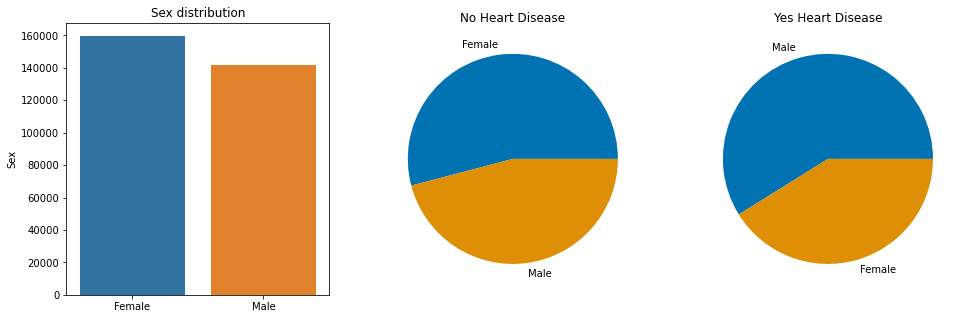

In [12]:
HeartDisease_and_bin('Sex')

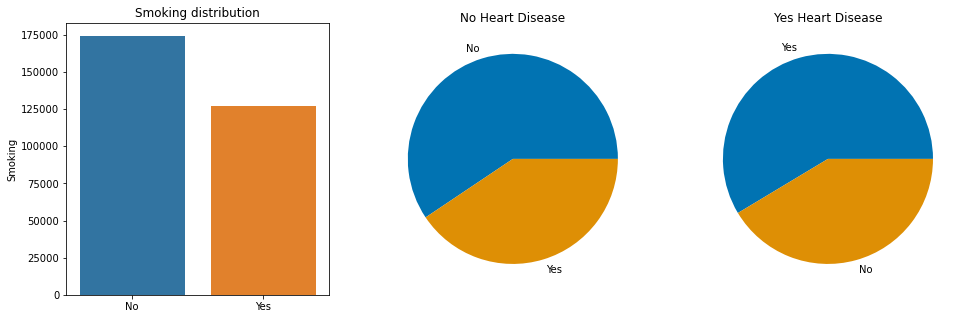

In [13]:
HeartDisease_and_bin('Smoking')

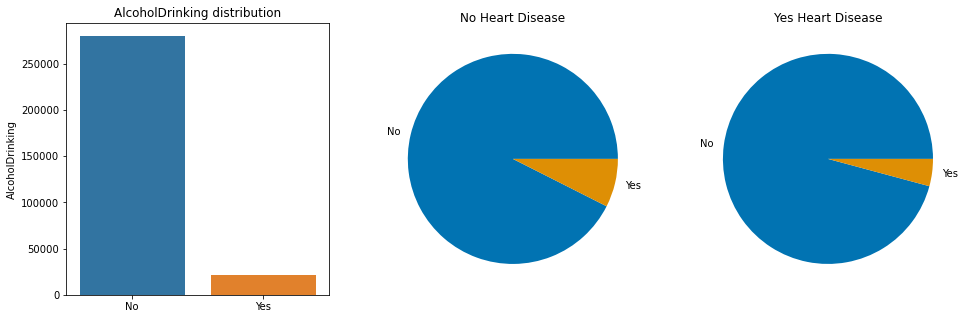

In [14]:
HeartDisease_and_bin('AlcoholDrinking')

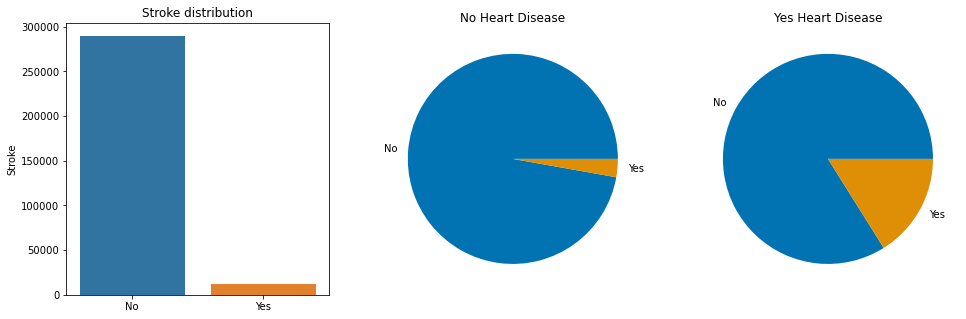

In [15]:
HeartDisease_and_bin('Stroke')

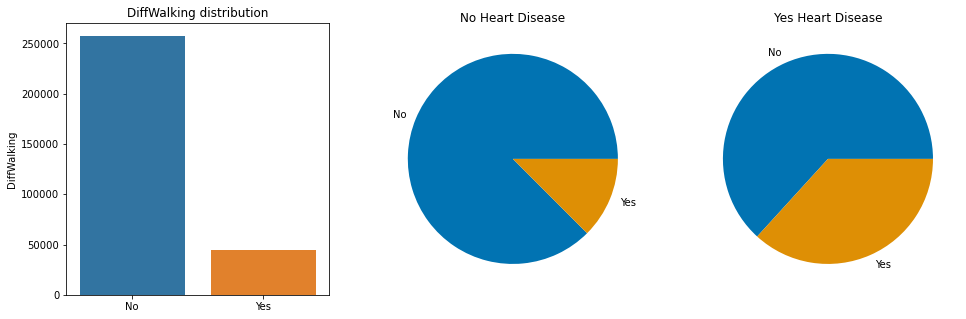

In [16]:
HeartDisease_and_bin('DiffWalking')

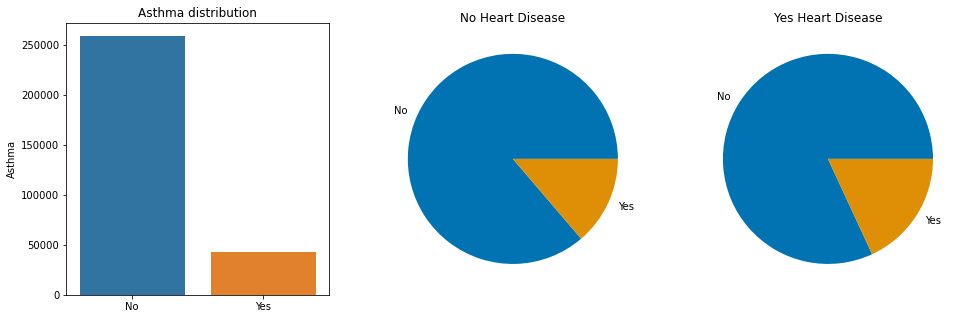

In [17]:
HeartDisease_and_bin('Asthma')

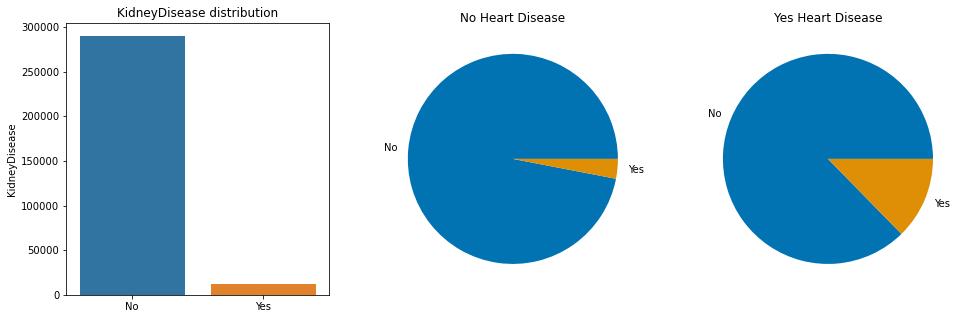

In [18]:
HeartDisease_and_bin('KidneyDisease')

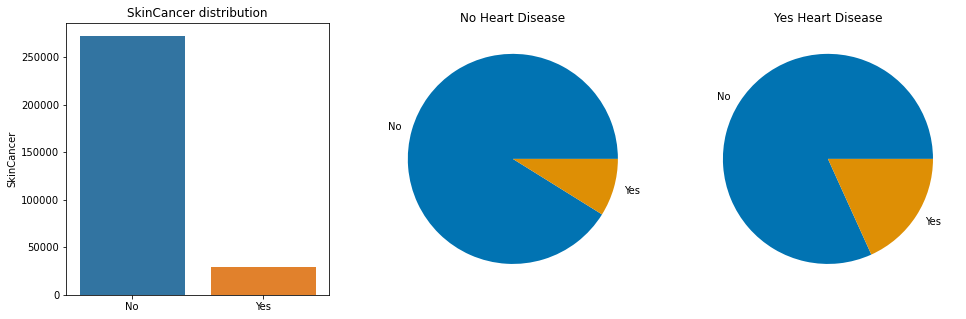

In [19]:
HeartDisease_and_bin('SkinCancer')

TARGET VARIABLE V/S CATEGORICAL VARIABLE

In [20]:
cat1 = hdata.nunique()[(hdata.nunique() > 2) & (hdata.nunique() < 14)].index
def HeartDisease_and_catig(col):
    fig, ax = plt.subplots(3,1,figsize=(10,15))

    colors = sns.color_palette('colorblind')

    hdata[col].value_counts().plot(kind='pie',colors=colors, ax=ax[0])
    ax[0].set_title(f" {col} distribution", fontsize=18)
    ax[0].set_ylabel('')

    sns.countplot(data=hdata.sort_values(col), x=col, hue='HeartDisease', ax=ax[1])
    ax[1].set_title(f"Distribution of HeartDisease by {col}", fontsize=18)
    ax[1].set_xlabel('')
    
    t = pd.DataFrame((hdata[hdata['HeartDisease']== 'Yes'][col].value_counts() / hdata[col].value_counts() * 100)).sort_values(col)
    sns.barplot(y=t[col], x=t[col].index, ax=ax[2])
    ax[2].set_title(f"Percentage of people with heart disease according to {col}", fontsize=18)
    ax[2].set_ylabel('Percentage')

    plt.show()

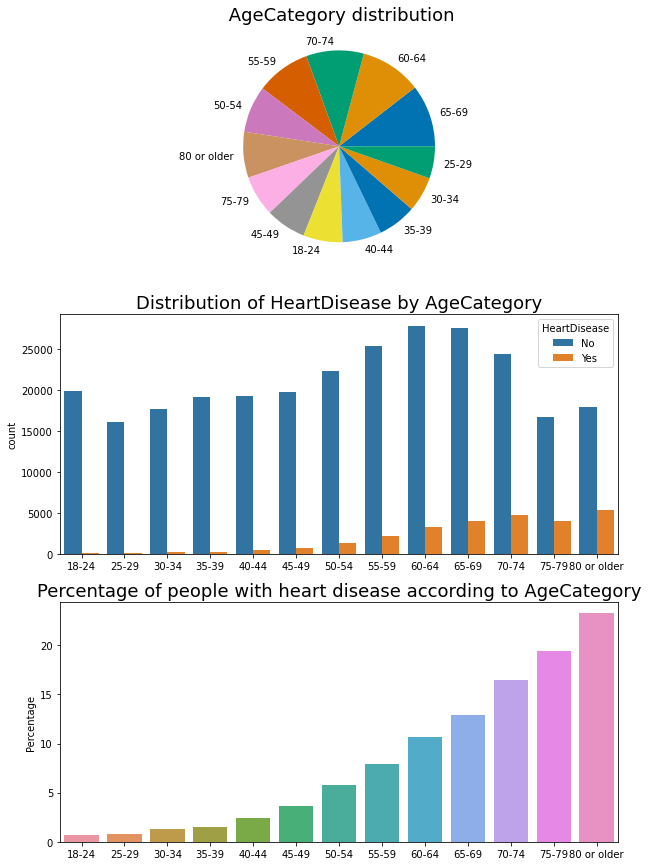

In [21]:
HeartDisease_and_catig('AgeCategory')

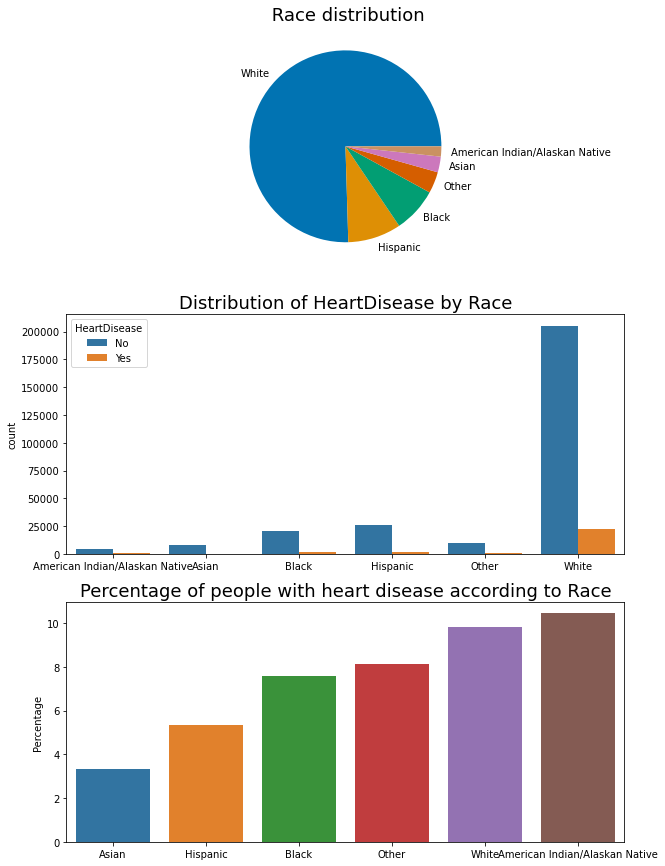

In [22]:
HeartDisease_and_catig('Race')

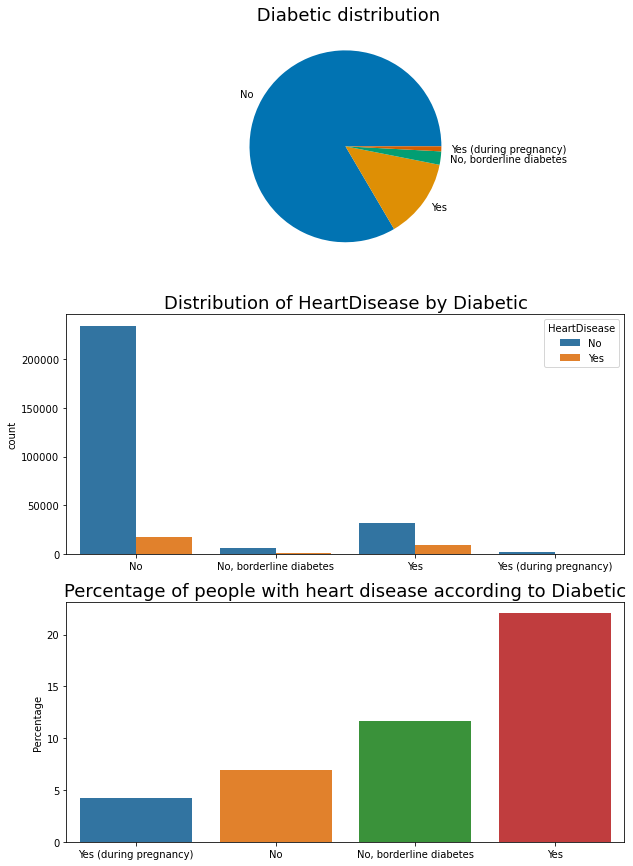

In [23]:
HeartDisease_and_catig('Diabetic')

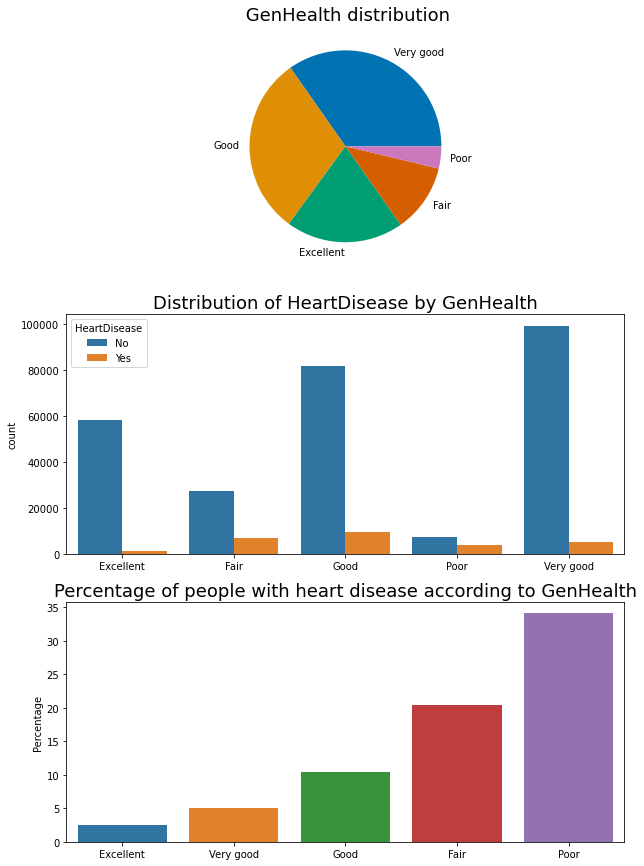

In [24]:
HeartDisease_and_catig('GenHealth')

In [25]:
hdata.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [26]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [27]:
hdata.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [28]:
#for loop for label encoder
#using labelEncoder for encoding object datatype columns in train dataset
from sklearn.preprocessing import LabelEncoder
oh = LabelEncoder()
hdata['Race'] = oh.fit_transform(hdata['Race'])
hdata['Diabetic'] = oh.fit_transform(hdata['Diabetic'])
hdata['GenHealth'] = oh.fit_transform(hdata['GenHealth'])


In [29]:
#it used when there consists 2 unique variables
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()
hdata['Asthma']=LB.fit_transform(hdata[['Asthma']])
hdata['KidneyDisease']=LB.fit_transform(hdata[['KidneyDisease']])
hdata['SkinCancer']=LB.fit_transform(hdata[['SkinCancer']])
hdata['PhysicalActivity']=LB.fit_transform(hdata[['PhysicalActivity']])
hdata['Sex']=LB.fit_transform(hdata[['Sex']])
hdata['DiffWalking']=LB.fit_transform(hdata[['DiffWalking']])
hdata['HeartDisease']=LB.fit_transform(hdata[['HeartDisease']])
hdata['Smoking']=LB.fit_transform(hdata[['Smoking']])
hdata['AlcoholDrinking']=LB.fit_transform(hdata[['AlcoholDrinking']])
hdata['Stroke']=LB.fit_transform(hdata[['Stroke']])



In [30]:
hdata['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [31]:
age = {}
for i in hdata['AgeCategory'].unique():
    x = int(i[:2])
    age[i] = x
age 

{'55-59': 55,
 '80 or older': 80,
 '65-69': 65,
 '75-79': 75,
 '40-44': 40,
 '70-74': 70,
 '60-64': 60,
 '50-54': 50,
 '45-49': 45,
 '18-24': 18,
 '35-39': 35,
 '30-34': 30,
 '25-29': 25}

In [32]:
hdata['AgeCategory'] = hdata['AgeCategory'].map(age)


In [33]:
hdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,5,0,1,4,8.0,0,0,0


In [34]:
hdata.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

Text(0.5, 0, 'Attributes')

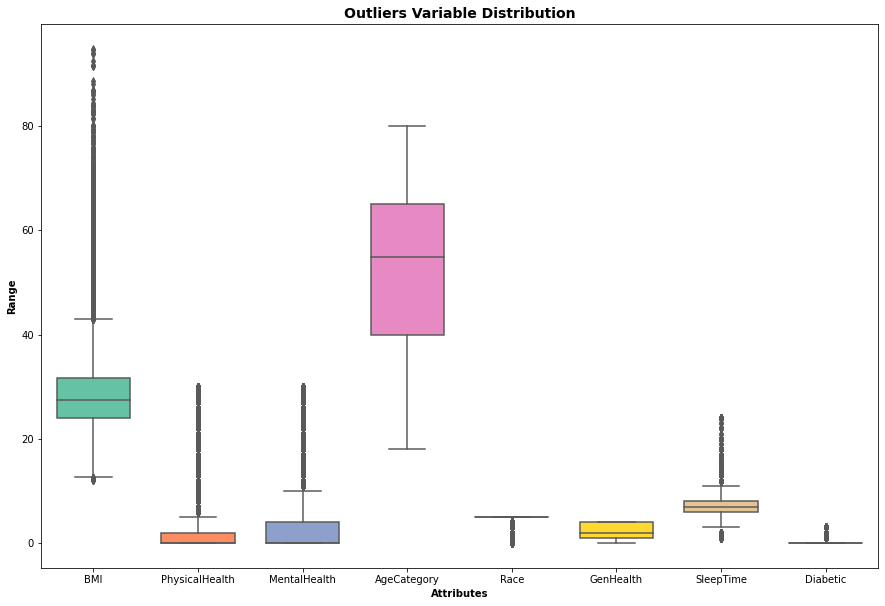

In [35]:
# Outlier Analysis of TotalPrice, Frequency and Recency

import seaborn as sns

variables = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','GenHealth','SleepTime','Diabetic']
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = hdata[variables], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [36]:
hdata.shape

(301717, 18)

In [37]:
# Removing (statistical) outliers for BMI

Q1 = hdata.BMI.quantile(0.05)
Q3 = hdata.BMI.quantile(0.95)
IQR = Q3 - Q1
hdata = hdata[(hdata.BMI >= Q1 - 1.5*IQR) & (hdata.BMI <= Q3 + 1.5*IQR)]

In [38]:
hdata.shape

(301597, 18)

In [39]:
# Removing (statistical) outliers for PhysicalHealth

Q1 = hdata.PhysicalHealth.quantile(0.05)
Q3 = hdata.PhysicalHealth.quantile(0.95)
IQR = Q3 - Q1
hdata = hdata[(hdata.PhysicalHealth >= Q1 - 1.5*IQR) & (hdata.PhysicalHealth <= Q3 + 1.5*IQR)]

In [40]:
hdata.shape

(301597, 18)

In [41]:
# Removing (statistical) outliers for MentalHealth

Q1 = hdata.MentalHealth.quantile(0.05)
Q3 = hdata.MentalHealth.quantile(0.95)
IQR = Q3 - Q1
hdata = hdata[(hdata.MentalHealth >= Q1 - 1.5*IQR) & (hdata.MentalHealth <= Q3 + 1.5*IQR)]

In [42]:
hdata.shape

(301597, 18)

In [43]:
hdata.nunique()

HeartDisease           2
BMI                 3501
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [44]:
cols = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','GenHealth','SleepTime','Diabetic']

In [47]:
#dividing dataseyt into x and y here x contains all the independent variables and y is target variable

#seperating independent variable and dependent variable 
IndepVar = []
for col in hdata.columns:
    if col != 'HeartDisease':
        IndepVar.append(col)

TargetVar = 'HeartDisease'
x = hdata[IndepVar]
y = hdata[TargetVar]

In [48]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

h_count = hdata.HeartDisease.value_counts()
print('Class 0:', h_count[0])
print('Class 1:', h_count[1])
print('Proportion:', round(h_count[0] / h_count[1], 2), ': 1')
print('Total records:', len(hdata))
#if the count>10 we should apply random over sumpling or under sampling

Class 0: 274349
Class 1: 27248
Proportion: 10.07 : 1
Total records: 301597


In [49]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(315501, 17)
(315501,)


In [50]:
#dividing the dataset into train and test
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size = 0.2, random_state = 42)#HERE SOME time strtify=y is used it is used to split variables types in exact ratio of 70 and 30%s
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((252400, 17), (63101, 17), (252400,), (63101,))

In [51]:
#normalising continuous variables
#Standard scaler follows normal distribution maintains zero mean and unit variance, Min max scaler scales data between [0,1]or [-1,1].

#scaling is just way of compressing data, the proportions remains same generally for example look at scaled images of two tigers in google it will help understand better.
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [52]:
hResults=pd.read_csv(r"E:\internhip project\HTResults.csv",header=0)
hResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1370  6854]
 [ 1051 53826]]
Outcome values : 
 1370 6854 1051 53826
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.17      0.26      8224
           0       0.89      0.98      0.93     54877

    accuracy                           0.87     63101
   macro avg       0.73      0.57      0.59     63101
weighted avg       0.85      0.87      0.84     63101

Accuracy : 87.5 %
Precision : 56.6 %
Recall : 16.7 %
F1 Score : 0.257
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 57.4 %
MCC : 0.258
roc_auc_score: 0.574


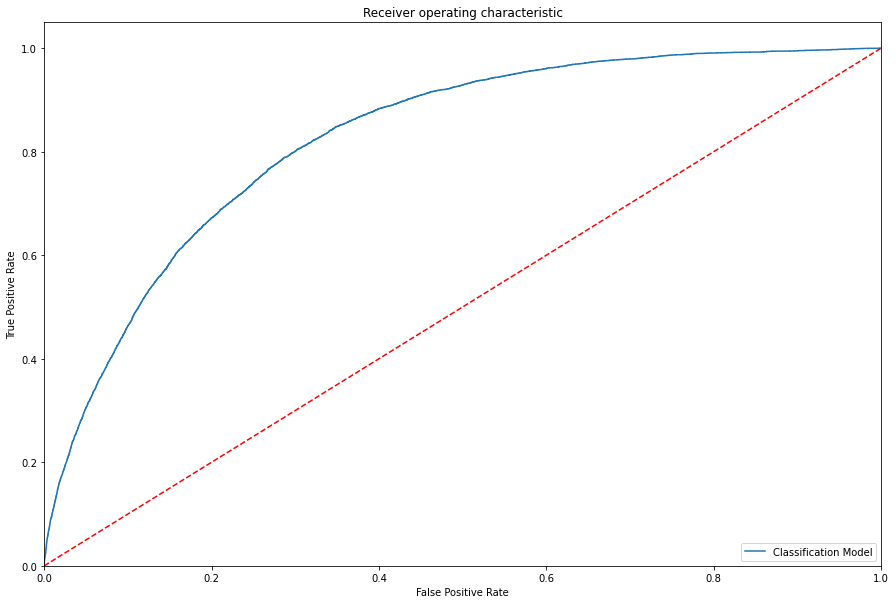

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 4365  3859]
 [ 4915 49962]]
Outcome values : 
 4365 3859 4915 49962
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.53      0.50      8224
           0       0.93      0.91      0.92     54877

    accuracy                           0.86     63101
   macro avg       0.70      0.72      0.71     63101
weighted avg       0.87      0.86      0.86     63101

Accuracy : 86.1 %
Precision : 47.0 %
Recall : 53.1 %
F1 Score : 0.499
Specificity or True Negative Rate : 91.0 %
Balanced Accuracy : 72.0 %
MCC : 0.419
roc_auc_score: 0.721


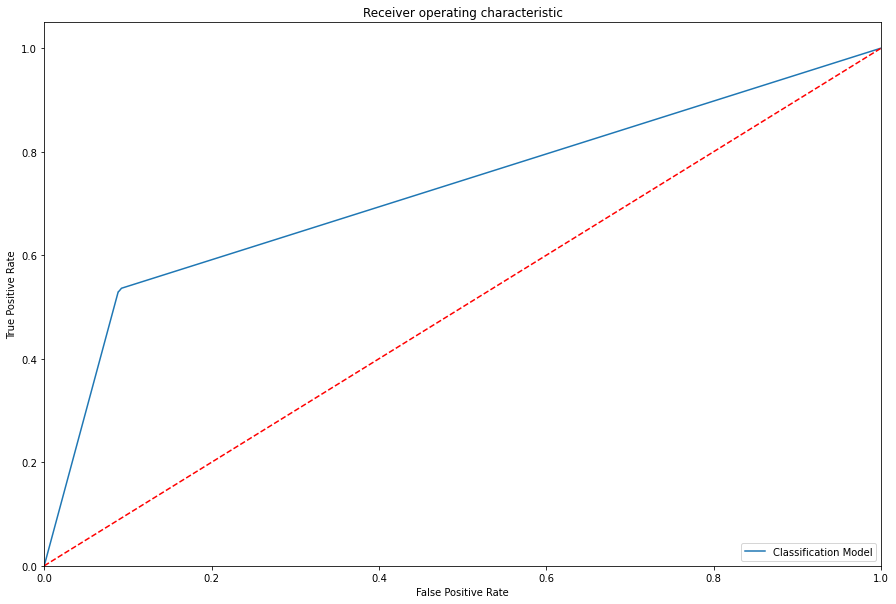

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 4443  3781]
 [ 1759 53118]]
Outcome values : 
 4443 3781 1759 53118
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.54      0.62      8224
           0       0.93      0.97      0.95     54877

    accuracy                           0.91     63101
   macro avg       0.82      0.75      0.78     63101
weighted avg       0.91      0.91      0.91     63101

Accuracy : 91.2 %
Precision : 71.6 %
Recall : 54.0 %
F1 Score : 0.616
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 75.4 %
MCC : 0.575
roc_auc_score: 0.754


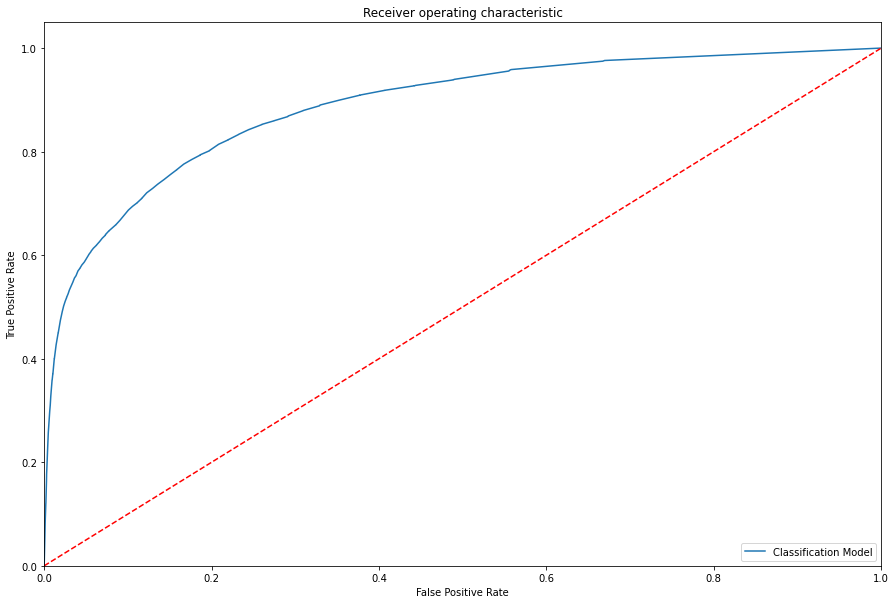

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 4560  3664]
 [ 2186 52691]]
Outcome values : 
 4560 3664 2186 52691
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.55      0.61      8224
           0       0.93      0.96      0.95     54877

    accuracy                           0.91     63101
   macro avg       0.81      0.76      0.78     63101
weighted avg       0.90      0.91      0.90     63101

Accuracy : 90.7 %
Precision : 67.6 %
Recall : 55.4 %
F1 Score : 0.609
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 75.7 %
MCC : 0.561
roc_auc_score: 0.757


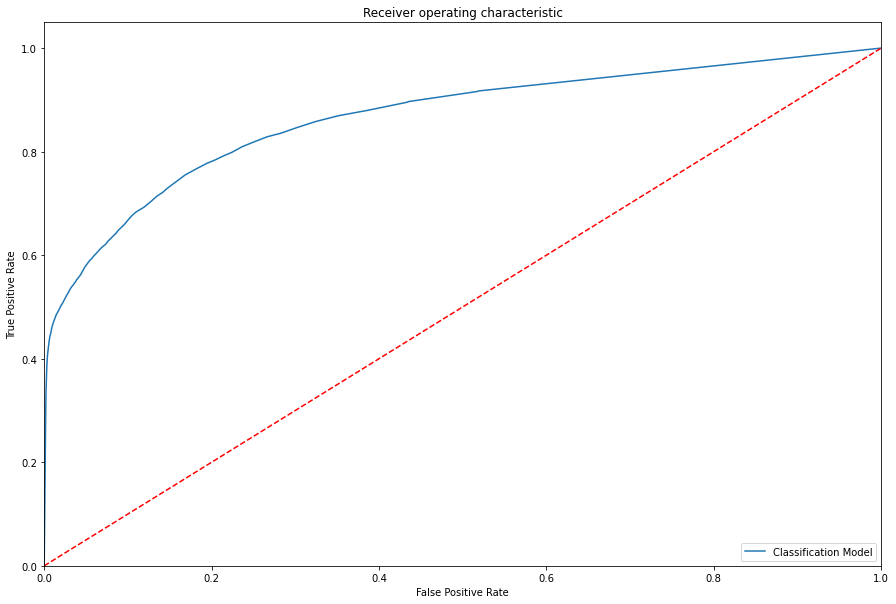

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2703  5521]
 [ 3190 51687]]
Outcome values : 
 2703 5521 3190 51687
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.33      0.38      8224
           0       0.90      0.94      0.92     54877

    accuracy                           0.86     63101
   macro avg       0.68      0.64      0.65     63101
weighted avg       0.85      0.86      0.85     63101

Accuracy : 86.2 %
Precision : 45.9 %
Recall : 32.9 %
F1 Score : 0.383
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 63.6 %
MCC : 0.313
roc_auc_score: 0.635


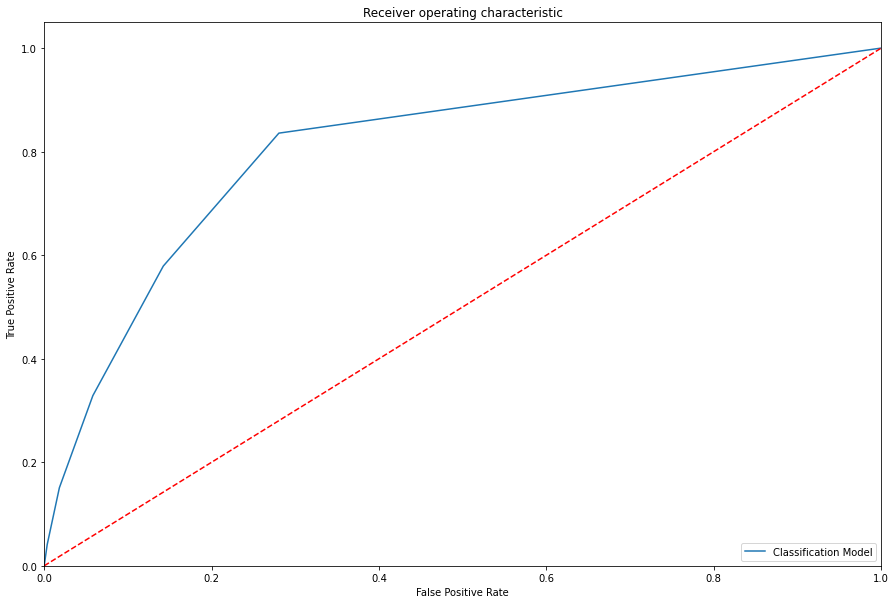

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 4052  4172]
 [ 1823 53054]]
Outcome values : 
 4052 4172 1823 53054
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.49      0.57      8224
           0       0.93      0.97      0.95     54877

    accuracy                           0.90     63101
   macro avg       0.81      0.73      0.76     63101
weighted avg       0.90      0.90      0.90     63101

Accuracy : 90.5 %
Precision : 69.0 %
Recall : 49.3 %
F1 Score : 0.575
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 73.0 %
MCC : 0.532
roc_auc_score: 0.73


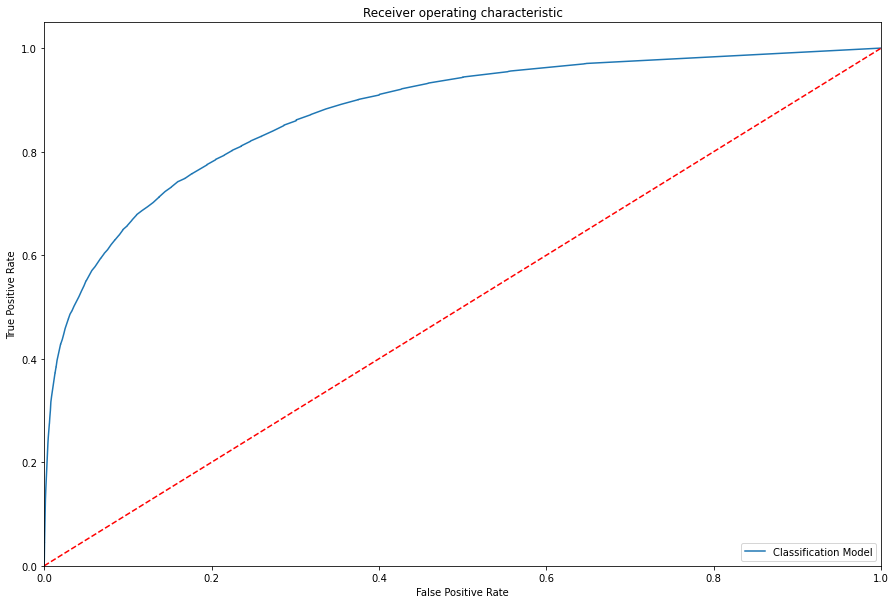

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[ 1468  6756]
 [ 1009 53868]]
Outcome values : 
 1468 6756 1009 53868
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.18      0.27      8224
           0       0.89      0.98      0.93     54877

    accuracy                           0.88     63101
   macro avg       0.74      0.58      0.60     63101
weighted avg       0.85      0.88      0.85     63101

Accuracy : 87.7 %
Precision : 59.3 %
Recall : 17.9 %
F1 Score : 0.274
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 58.0 %
MCC : 0.278
roc_auc_score: 0.58


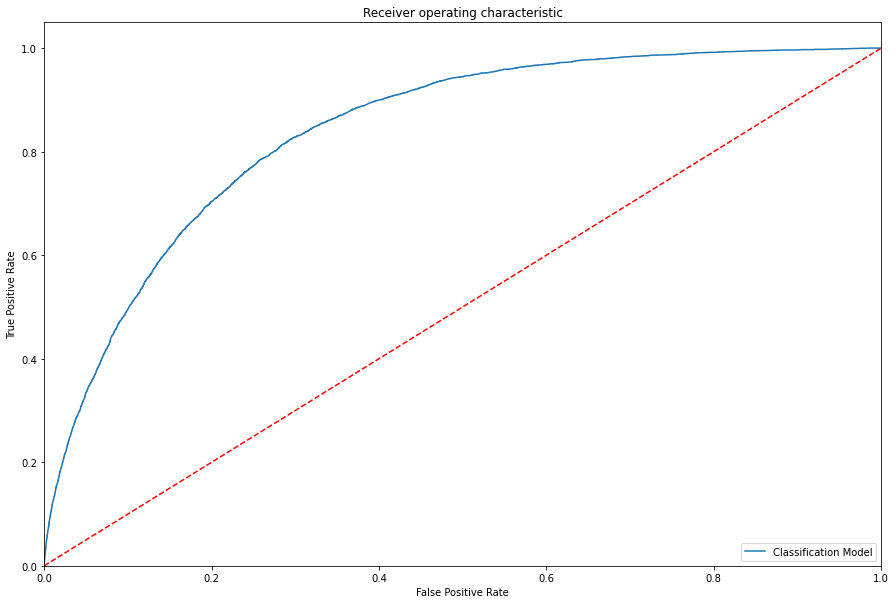

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 1514  6710]
 [ 1000 53877]]
Outcome values : 
 1514 6710 1000 53877
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.18      0.28      8224
           0       0.89      0.98      0.93     54877

    accuracy                           0.88     63101
   macro avg       0.75      0.58      0.61     63101
weighted avg       0.85      0.88      0.85     63101

Accuracy : 87.8 %
Precision : 60.2 %
Recall : 18.4 %
F1 Score : 0.282
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 58.3 %
MCC : 0.286
roc_auc_score: 0.583


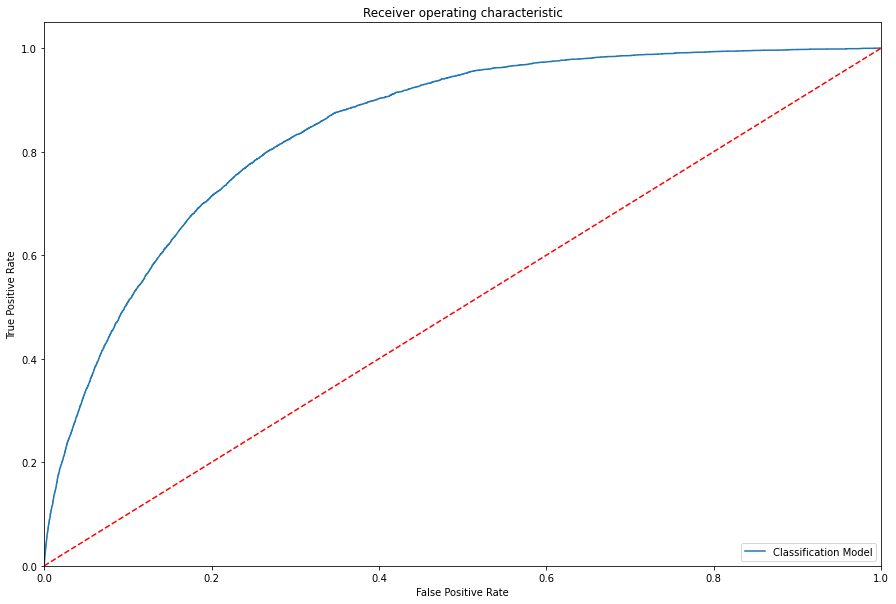

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 3826  4398]
 [ 7071 47806]]
Outcome values : 
 3826 4398 7071 47806
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.47      0.40      8224
           0       0.92      0.87      0.89     54877

    accuracy                           0.82     63101
   macro avg       0.63      0.67      0.65     63101
weighted avg       0.84      0.82      0.83     63101

Accuracy : 81.8 %
Precision : 35.1 %
Recall : 46.5 %
F1 Score : 0.4
Specificity or True Negative Rate : 87.1 %
Balanced Accuracy : 66.8 %
MCC : 0.3
roc_auc_score: 0.668


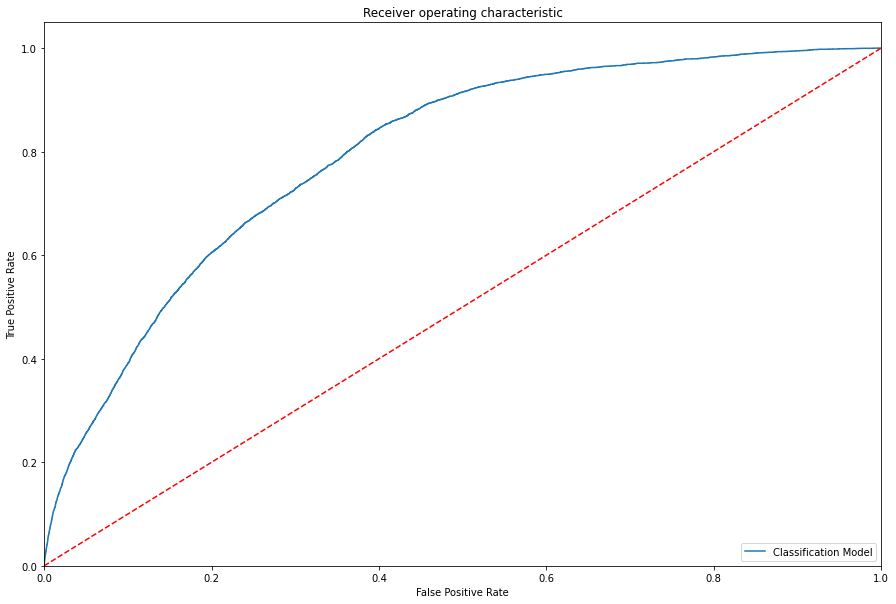

-----------------------------------------------------------------------------------------------------


In [53]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)


modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    hResults = hResults.append(new_row, ignore_index=True)


In [ ]:
hResults.head(10)

# 1.randomforest
2.extra tree classifier
3.bagging classifier

# HYPER PARAMETER TUNING FOR TOP2 ALGORITHMS

In [ ]:
HhtResults=pd.read_csv(r"C:\Users\Eswar\Desktop\internhip project\HTResults.csv",header=0)
HhtResults

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest 
max_features = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,http://localhost:8888/notebooks/Untitled28-Copy3.ipynb#

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

<class 'pandas.core.frame.DataFrame'>
